In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d


plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

from scipy.integrate import quad,dblquad

from matplotlib import cm

from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.close()

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

### Example

Consider the vector field $\vec F(x,y,z) = x\,\vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $x=0$ for $0 \leq y,z \leq 1$
  - $\Omega_2$: piece of the surface $x= 3y(1-y)$ for $0 \leq y,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

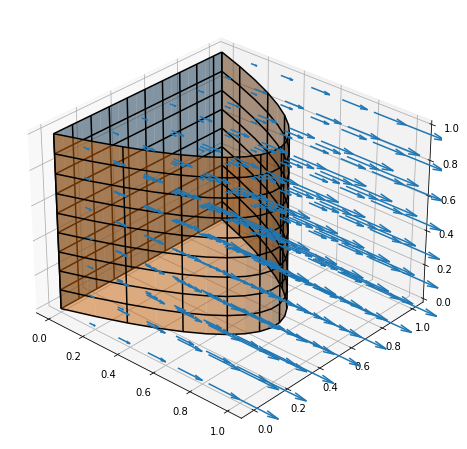

In [2]:
@interact
def _(angle = (-96,6,6),caps=False):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(0*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(0*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.plot_surface(3*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(3*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    if caps:
        ax.plot_surface(3*V*U*(1-U),U,np.ones_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.ones_like(V),alpha=1,color='k',rcount=10,ccount=10)
        ax.plot_surface(3*V*U*(1-U),U,np.zeros_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.zeros_like(V),alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,U,0*U,0*U,length=.2);


<p style="padding-bottom:40%;"> </p>

# Lecture 24

  - Objectives
    - Curl
      - compute the curl of a vector field
      - interpret direction and magtitude of curl vector
      - relate to grad and div
    - Stokes' Theorem
      - orient a surface and its boundary
      - recognize when it applies
      - relate to divergence theorem
  - Resources
    - Content
      - Stewart: §16.6-9
      - New Strang:  
        - [§6.7](https://openstax.org/books/calculus-volume-3/pages/6-7-stokes-theorem)
      - [3Demos](https://drew.youngren.nyc/3Demos/surfint/)
      - Mooculus: [Surface Integrals](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInSurfaceIntegrals) [Stokes' Theorem](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInStokesTheorem)
    - Extras 
      - CalcBLUE: [Stokes' Theorem](https://www.youtube.com/watch?v=ypFo3YPtWBg&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=77) *Use with caution. This is a different and more general formulation of surface integrals. 

<p style="padding-bottom:40%;"> </p>

## Div, curl, etc.

Recall out notation $$\nabla = \frac{\partial}{\partial x} \,\vec i + \frac{\partial}{\partial y} \,\vec j + \frac{\partial}{\partial z} \,\vec k $$

Applying vector operations to thids "vector" yields different kinds of derivatives:


| name |&nbsp; form| in | out |
|---|---|---|---|
|derivative | &nbsp; $$\frac{d}{dx} f(x)$$ | scalar | scalar | 
|partial | $\frac{\partial}{\partial x}f(x,y)$ | scalar | scalar | 
| grad | $\nabla f(x,y)$ | scalar | vector |
| div | $\nabla \cdot \vec F(x,y,z)$ | vector | scalar |
| curl | $\nabla \times \vec F(x,y,z)$ | vector | vector |

# Curl

The curl of a vector field $$ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z) \,\vec k $$ is another vector field given by 

$$\operatorname{curl}\vec F = \nabla \times \vec F = \begin{vmatrix}
\vec i & \vec j & \vec k \\ \partial_x & \partial_y & \partial_z \\ P & Q & R \\ \end{vmatrix} $$ 

$$ = (R_y - Q_z) \,\vec i + (P_z - R_x) \,\vec j + (Q_x - P_y) \,\vec k$$

The curl measures the spin or rotation of a vector field. It is a vector with the direction giving the axis of rotation and the magnitude indicating the strength of the rotation (as indicated by the right hand rule).  

<p style="padding-bottom:40%;"> </p>

## Example

Compute the curl $\nabla \times \vec F(-1/4,-1/4, -4/5)$ for the vector field 
$$ \vec F(x,y,z) = y \,\vec i - x  \,\vec j + \frac{x^2}{2} \,\vec k $$


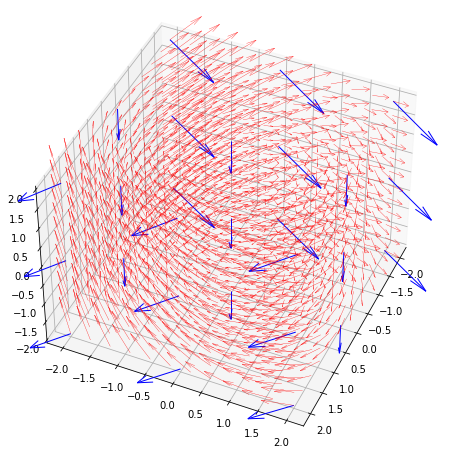

In [3]:
@interact(angle=(-6,96,6))
def _(angle = 24,vangle=(0,90,6)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    ax.view_init(vangle,angle)
    u = v = np.linspace(-2,2,12)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,V,-U,U**2/2,length=.2,color='r',lw=.3);
    u = v = np.linspace(-2,2,5)
    U,V,W = np.meshgrid(np.linspace(-2,2,3),np.linspace(-2,2,3),np.linspace(-2,2,3))
    ax.quiver(U,V,W,0*U,-U,-2-0*U,length=.4,color='b',lw=1);


<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

<img alt="George Stokes" src="http://mathshistory.st-andrews.ac.uk/BigPictures/Stokes_3.jpeg" style="float: right">

# Lecture 25

## Stokes' Theorem

  
  
  - Objectives

      - orient a surface and its boundary
      - see a brief justification
      - recognize when it applies
      

<p style="padding-bottom:40%;"> </p>

## Stokes' Theorem

Let $\Omega$ be an oriented surface in $\RR^3$ and $\partial \Omega$ its positively-oriented boundary. If $\vec F(x,y,z)$ is a smooth vector field, then

$$ \iint_{\Omega} \nabla \times\vec F \cdot d \vec S = \oint_{\partial \Omega} \vec F\cdot d \vec r$$

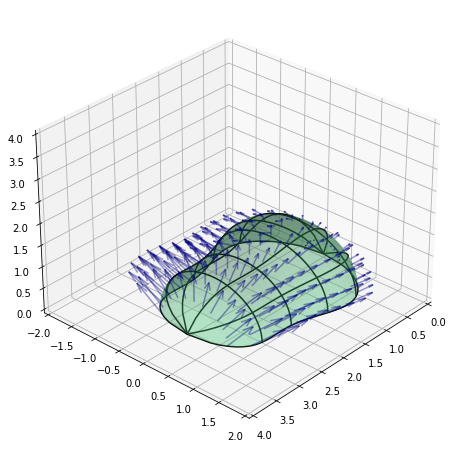

In [4]:
@interact(zoom=(0,1,.04),vangle=(0,90,6))
def _(zoom=0,angle=(-30,120,6),vangle=30,curl=False):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,55)
    v = np.linspace(0,1,55)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    ax.plot_surface(p,q,r,color=(.3,.8,.5,.4*(1-zoom)))
#     ax.plot_wireframe(p,q,r,alpha=1,color='k',rcount=6,ccount=6)
    ax.plot_wireframe(p,q,r,alpha=1-zoom,color='k',rstride=11,cstride=11)
    
    u = np.linspace(.2,.4,35)
    v = np.linspace(.2,.4,35)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    ax.plot_surface(p,q,r,color=(.3,.2,.8,zoom*.5))
    ax.plot_wireframe(p,q,r,alpha=zoom,color='k',rcount=3,ccount=3)

    u = np.linspace(.01,.95,13)
    v = np.linspace(.0,1,13)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    ax.quiver(p,q,r,-q,p*q,p,color=(0,0,.5,.4*(1-zoom)),length=.2)
    if curl:
        ax.quiver(p,q,r,np.zeros_like(p),-np.ones_like(p),q + 1,color=(1,0,0,.8*(1-zoom)),length=.2)


    u = np.linspace(.2,.4,4)
    v = np.linspace(.2,.4,4)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    ax.quiver(p,q,r,-q,p*q,p,color=(0,0,.5,.8*(zoom)),length=.2)

    u = np.linspace(.2+.2/6,.4-.2/6,3)
    v = np.linspace(.2+.2/6,.4-.2/6,3)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)    
    ax.quiver(p,q,r,np.zeros_like(p),-np.ones_like(p),q + 1,color=(1,0,0,.8*(zoom)),length=.2)


    ax.view_init(vangle,angle)
#     u = v = np.linspace(0,1,7)
#     # v = np.linspace(0,2*pi,10)
#     U,V,W = np.meshgrid(u,v,u)
#     ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);
    for c in 'xz':
        getattr(ax,f"set_{c}lim")((0+.5*zoom,4 - 2.5*zoom))
    ax.set_ylim((-2 + 2.2*zoom,2 - .8*zoom))


<p style="padding-bottom:40%;"> </p>

## Faraday's Law

$$-\frac{\partial \Phi}{\partial t} = \iint_{D(t)} -\frac{\partial B}{\partial t} d\vec S = \iint_{D(t)} \nabla\times \vec E\cdot d\vec S = \oint_{C(t)} \vec E\cdot d\vec r $$

![Diagram of magnetic field in solenoid](http://www.funscience.in/images/StudyZone/Physics/MagneticEffectsOfCurrent/MagneticLinesOfForceAroundASolenoidCarryingCurrent.jpg)

<p style="padding-bottom:40%;"> </p>

### Revisit Cone

Find the flux of the curl $\nabla\times \vec F$ of the vector field $2y\,\vec i + 3z\,\vec j +x\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.
  
  

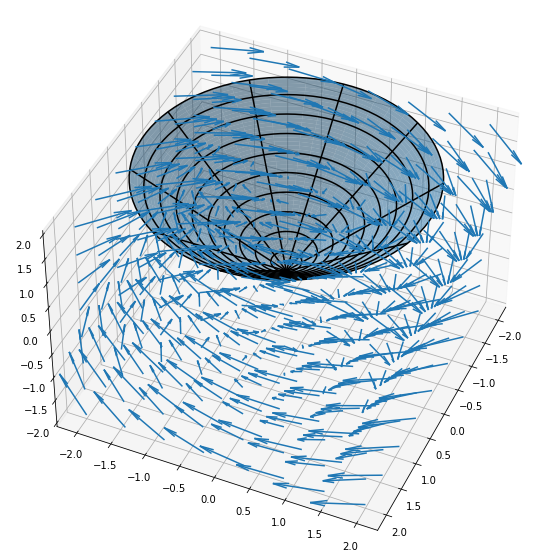

In [5]:
@interact(angle=(-6,96,6))
def _(angle = 24,vangle=(0,90,6),fade=(0,1,.04)):
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,2,100)
    v = np.linspace(0,2*pi,100)
    U,V = np.meshgrid(u,v)
    ax.view_init(vangle,angle)
    ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5)
    ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
    # ax.plot_surface(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=.5)
    # ax.plot_wireframe(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=1,color='k',rcount=10,ccount=10)
    u = v = np.linspace(-2,2,8)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,(V),W,2*V,3*W,U,length=.1,alpha=1-fade);
    ax.quiver(U,(V),W,0*U - 3,0*W - 1,0*U - 2,length=.2,lw=2,color='r',alpha=fade);


<p style="padding-bottom:40%;"> </p>

## Exercise

Compute the line integral $\oint_{\partial D} \vec F \cdot d\vec r$ around the ccw (from above) boundary of the surface $D$ given.

$$ \vec F(x,y,z) = xyz \,\vec i + y \,\vec j + z \,\vec k$$

where $D$ is the portion of the surface $z=x^2$ above $x^2 + y^2 \leq a^2$ in the first octant.

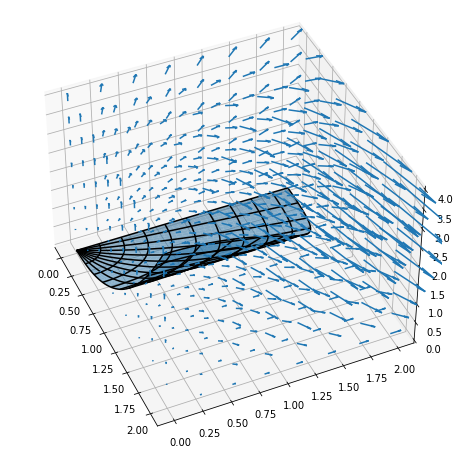

In [6]:
@interact(angle=(-96,6,6))
def _(angle = -24,vangle=(0,90,6)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,2,40)
    v = np.linspace(0,pi/2,40)
    U,V = np.meshgrid(u,v)
    ax.view_init(vangle,angle)
    ax.plot_surface(U*cos(V),U*sin(V),U**2*cos(V)**2,alpha=.5)
    ax.plot_wireframe(U*cos(V),U*sin(V),U**2*cos(V)**2,alpha=1,color='k',rcount=10,ccount=10)
    # ax.plot_surface(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=.5)
    # ax.plot_wireframe(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=1,color='k',rcount=10,ccount=10)
    u = v = np.linspace(0,2,8)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,2*u)
    ax.quiver(U,V,W,U*W*V,V,W,length=.05);
#     ax.quiver(U,V,W,0*U - 3,0*W - 1,0*U - 2,length=.2,lw=2,color='r');


<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

**Challenge** Parametrize the boundary of this surface and compute the line integral directly to verify this number.

<p style="padding-bottom:40%;"> </p>

# Let's Review

Four Big Theorems

  - FTLI
$$ f(C_{1}) - f(C_0) = \int_{C} \nabla f\cdot d\vec r $$

  - Green's Theorem
$$ \oint_{\partial D} P\, dx + Q\,dy = \iint_D (Q_x - P_y)\,dA $$

  - Divergence Theorem
  $$ \iint_{\partial E} \vec F \cdot d\vec S = \iiint_E \nabla\cdot \vec F \,dV $$
  

  - Stokes' Theorem
  $$ \oint_{\partial \Omega} \vec F\cdot d\vec r = \iint_\Omega \nabla\times F \cdot d\vec S$$ 